In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve)

import gradio as gr


In [8]:
df = pd.read_csv("/kaggle/input/uci-credit-card-dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
df.shape

(30000, 25)

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [13]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
df.rename(columns={'default.payment.next.month': 'Default'}, inplace=True)

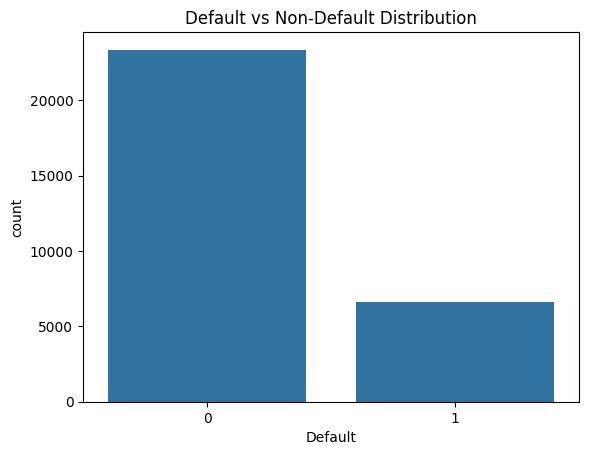

In [15]:
sns.countplot(x='Default', data=df)
plt.title("Default vs Non-Default Distribution")
plt.show()

In [16]:
df['Default'].value_counts(normalize=True)

Default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

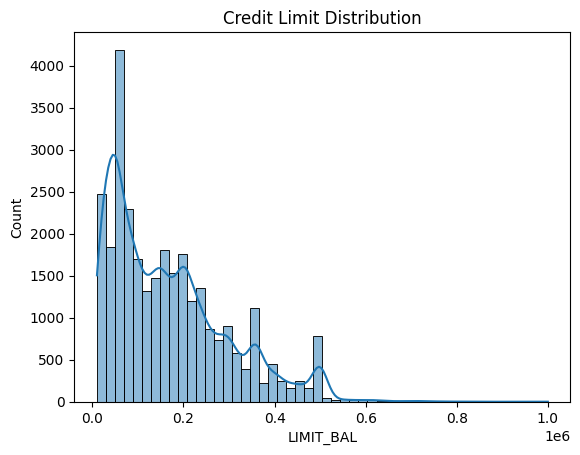

In [17]:
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title("Credit Limit Distribution")
plt.show()

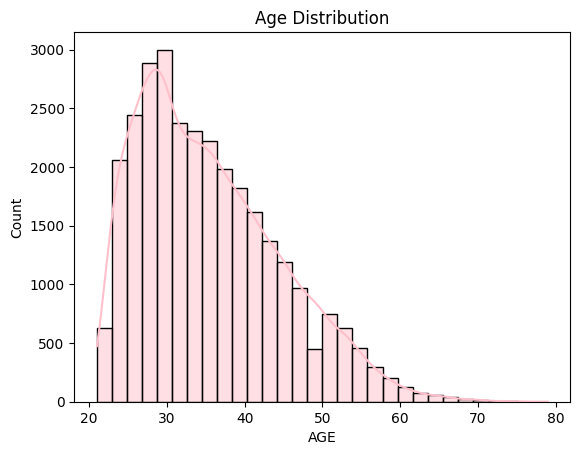

In [18]:
sns.histplot(df['AGE'], bins=30, kde=True, color='pink')
plt.title("Age Distribution")
plt.show()

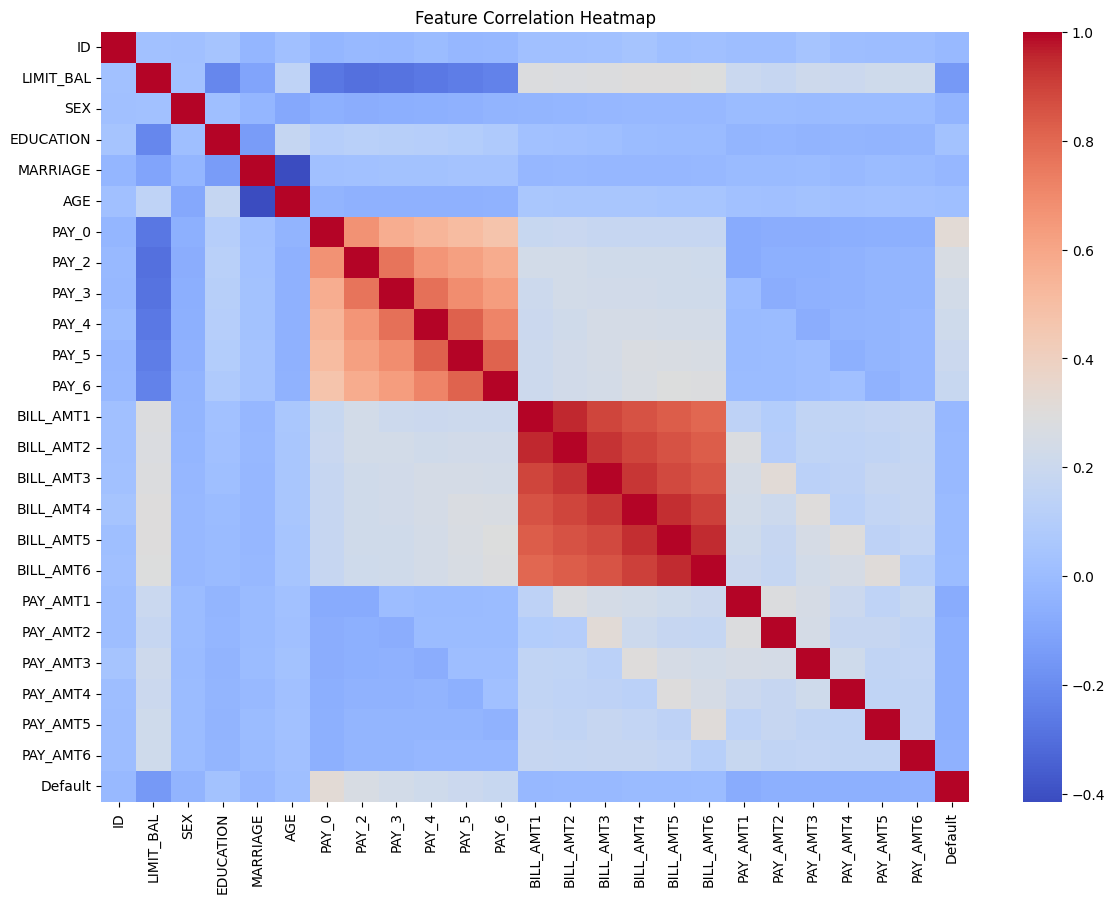

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for col in pay_cols:
    df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

In [21]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

df['TOTAL_BILL'] = df[bill_cols].sum(axis=1)
df['TOTAL_PAY'] = df[pay_amt_cols].sum(axis=1)

In [22]:
df.drop(columns=['ID'], inplace=True)

In [23]:
final_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','TOTAL_BILL','TOTAL_PAY']

In [24]:
X = df[final_features]
y = df['Default']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8058333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4673
           1       0.63      0.29      0.40      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



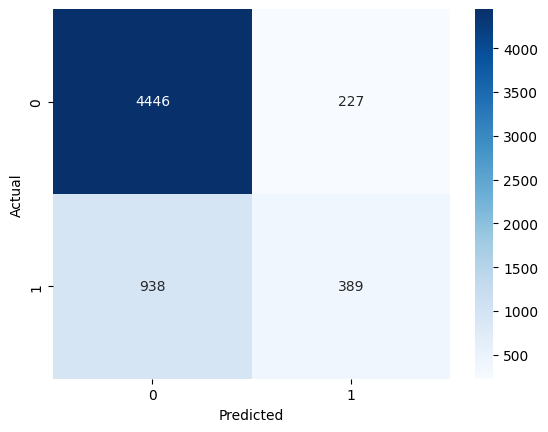

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

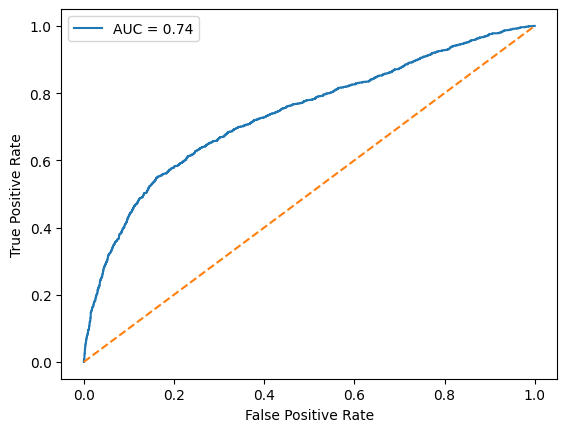

In [30]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [31]:
def predict_default(limit_bal, age, sex, education, marriage,pay_0, pay_2, pay_3, pay_4, pay_5, pay_6,total_bill, total_pay):
    input_data = pd.DataFrame([[limit_bal, sex, education, marriage, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, total_bill, total_pay ]], columns=final_features)

    input_scaled = scaler.transform(input_data)
    pred = model.predict(input_scaled)[0]
    prob = model.predict_proba(input_scaled)[0][1]

    return (
        f"High Risk of Default (Probability: {prob:.2f})"
        if pred == 1 else
        f"Low Risk of Default (Probability: {prob:.2f})"
    )


In [32]:
interface = gr.Interface(
    fn=predict_default,
    inputs=[
        gr.Number(value=200000, label="Credit Limit"),
        gr.Number(value=30, label="Age"),
        gr.Radio([1, 2], value=2, label="Sex (1=Male, 2=Female)"),
        gr.Radio([1, 2, 3, 4], value=2, label="Education"),
        gr.Radio([1, 2, 3], value=1, label="Marriage"),
        gr.Radio([0, 1], value=0, label="PAY_0 (Delay?)"),
        gr.Radio([0, 1], value=0, label="PAY_2"),
        gr.Radio([0, 1], value=0, label="PAY_3"),
        gr.Radio([0, 1], value=0, label="PAY_4"),
        gr.Radio([0, 1], value=0, label="PAY_5"),
        gr.Radio([0, 1], value=0, label="PAY_6"),
        gr.Number(value=50000, label="Total Bill Amount"),
        gr.Number(value=60000, label="Total Payment Amount")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="Credit Card Default Prediction",
    description=(
        "Logistic Regression model trained on UCI Credit Card Dataset.\n"
        "Default values are pre-filled for quick testing — modify inputs to explore risk."
    )
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).


Could not create share link. Missing file: /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.3
3. Move the file to this location: /root/.cache/huggingface/gradio/frpc
